# Guided Project: Visualizing The Gender Gap In College Degrees

We continue working with the dataset about the percentage of bachelor's degrees granted to women from 1970 to 2012.

There are 17 categories of degrees. In this project we will compare gender gap across all the degree categories.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website.

**1. Introduction to the data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

women_degrees = pd.read_csv(
    'percent-bachelors-degrees-women-usa.csv')

women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


Each columns shows the percentage of degrees awarded to women and rows show data for each year.

**2. Comparing across all degrees**

We can then group the degrees into STEM, liberal arts, and other, in the following way:


In [2]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

**Comparing across STEM group**

C:\Users\Dieu Anh\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


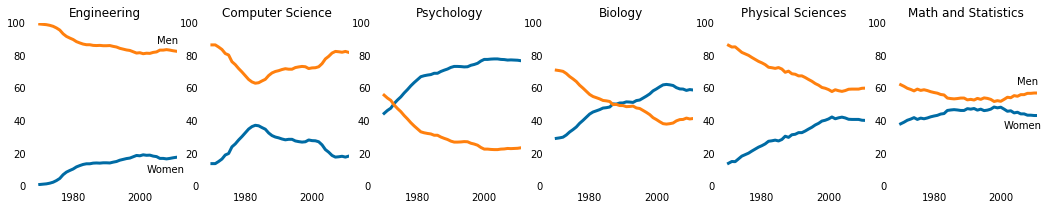

In [3]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 
             'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], 
            c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], 
            c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns.

We generate line charts for both male and female percentages for every degree in stem_cats, lib_arts_cats, and other_cats in 3 columns.

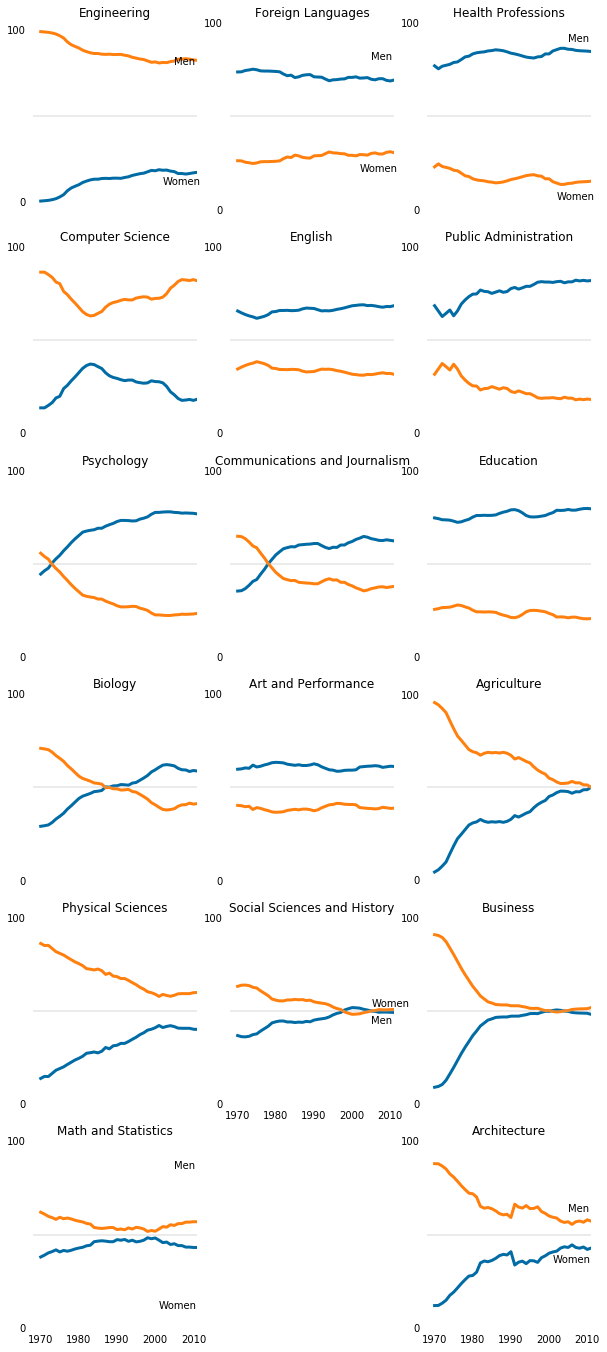

In [4]:
fig = plt.figure(figsize=(10, 24))

#Ploting stem_cats
for sp in range (0,6):
    degrees=stem_cats
    ax = fig.add_subplot(6,3,sp+(2*sp+1))
    
    #Line charts for female percentage
    ax.plot(women_degrees['Year'], women_degrees[degrees[sp]], 
                c=cb_dark_blue, label='Women', linewidth=3)


    #Ploting line charts for male percentages
    ax.plot(women_degrees['Year'], 100-women_degrees[degrees[sp]], 
                c=cb_orange, label='Men', linewidth=3)
    
    #Set name of each plot with degree's name
    ax.set_title(degrees[sp])
    
    #Set all spines visible
    for key, spine in ax.spines.items(): spine.set_visible(False)
    
    ax.set_xlim(1968, 2011)

    #Disable the x-axis labels for all line charts except for the bottommost line chart
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
    #Remove all the ticks except 0 and 100
    ax.set_yticks([0,100])
        
    #Add horizontal line start at the y-axis position 50%
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    #Add labels for line charts 
    if sp == 0:
        ax.text(2005, 80, 'Men')
        ax.text(2002, 10, 'Women')
    elif sp == 5:
        ax.text(2005, 85, 'Men')
        ax.text(2001, 10, 'Women')
        ax.tick_params(labelbottom='on')
    

#Ploting lib_art_cats    
for sp in range (0,5):
    degrees= lib_arts_cats
    ax = fig.add_subplot(6,3,sp+(2*sp+2))
    ax.plot(women_degrees['Year'], women_degrees[degrees[sp]], 
                c=cb_dark_blue, label='Women', linewidth=3)

    ax.plot(women_degrees['Year'], 100-women_degrees[degrees[sp]], 
                c=cb_orange, label='Men', linewidth=3)
    ax.set_title(degrees[sp])
    for key, spine in ax.spines.items(): spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp == 0:
        ax.text(2005, 80, 'Men')
        ax.text(2002, 20, 'Women')
    elif sp == 4:
        ax.text(2005, 52, 'Women')
        ax.text(2005, 43, 'Men')
        ax.tick_params(labelbottom='on')

#Ploting other_cats        
for sp in range (0,6):
    degrees= other_cats
    ax = fig.add_subplot(6,3,sp+(2*sp+3))
    ax.plot(women_degrees['Year'], women_degrees[degrees[sp]], 
                c=cb_dark_blue, label='Women', linewidth=3)

    ax.plot(women_degrees['Year'], 100-women_degrees[degrees[sp]], 
                c=cb_orange, label='Men', linewidth=3)
    ax.set_title(degrees[sp])
    for key, spine in ax.spines.items(): spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp == 0:
        ax.text(2005, 90, 'Men')
        ax.text(2002, 5, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        #Keep year label for the last plot only
        ax.tick_params(labelbottom='on')

#Export plots as image type        
plt.savefig("gender_degrees.png")
plt.show()
